In [2]:
# made by Gibeom LEE, HI LAB
# 한 폴더 내 모든 csv 파일의 TENG Vpp값을 구할 때 유용합니다.

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

Extend_I_Ctype_2-1_Vpp: 0.00 V


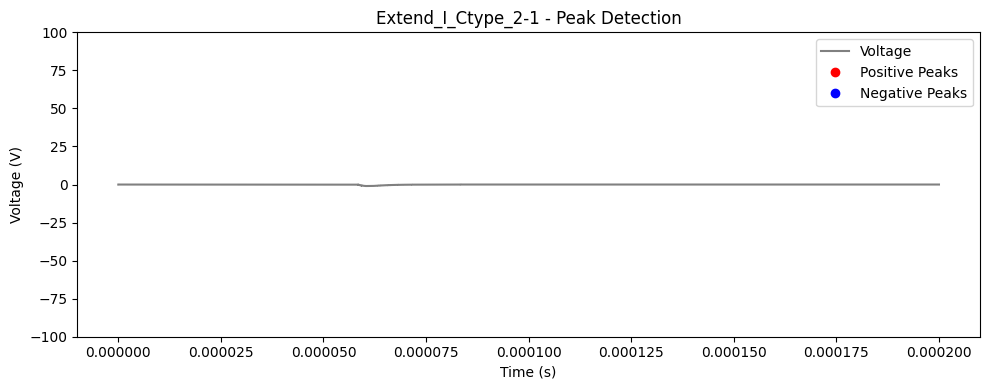

Extend_I_Ctype_2-2_Vpp: 0.00 V


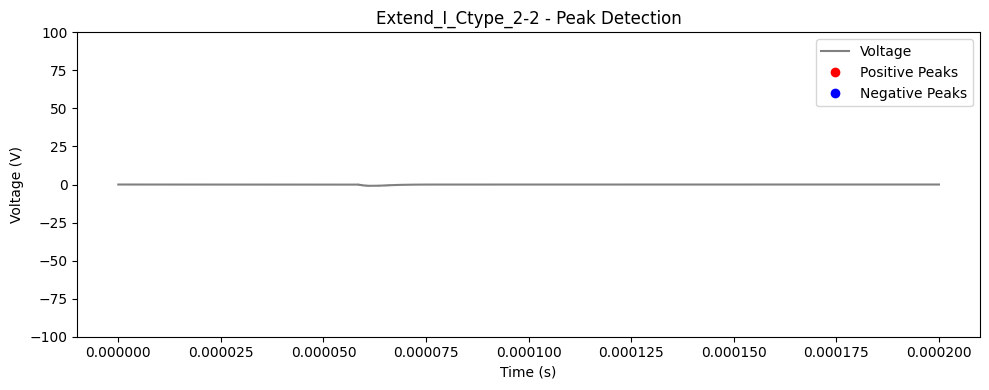

Extend_I_Ctype_2-3_Vpp: 0.00 V


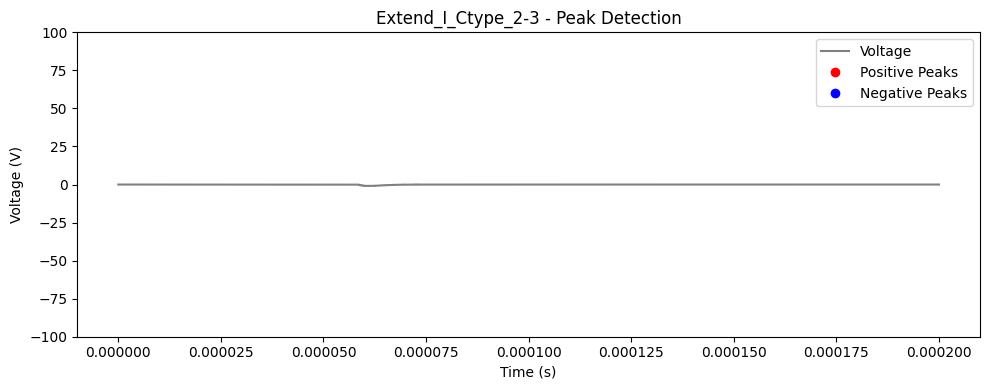

Extend_I_Ctype_2-4_Vpp: 0.00 V


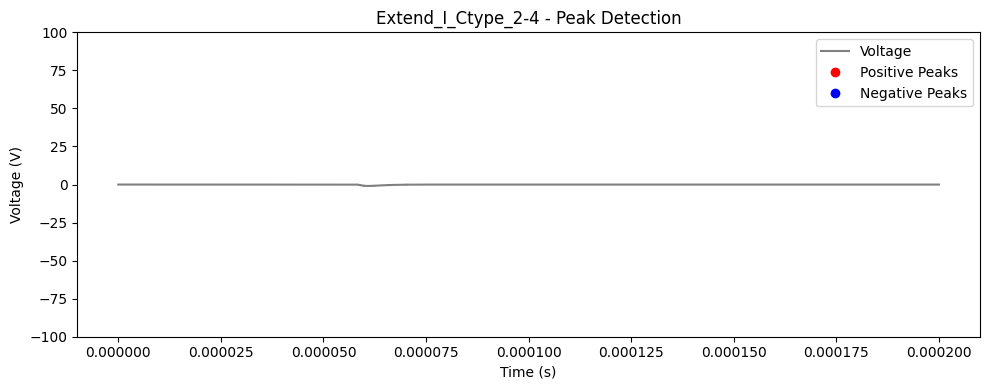

Extend_I_Ctype_2-5_Vpp: 0.00 V


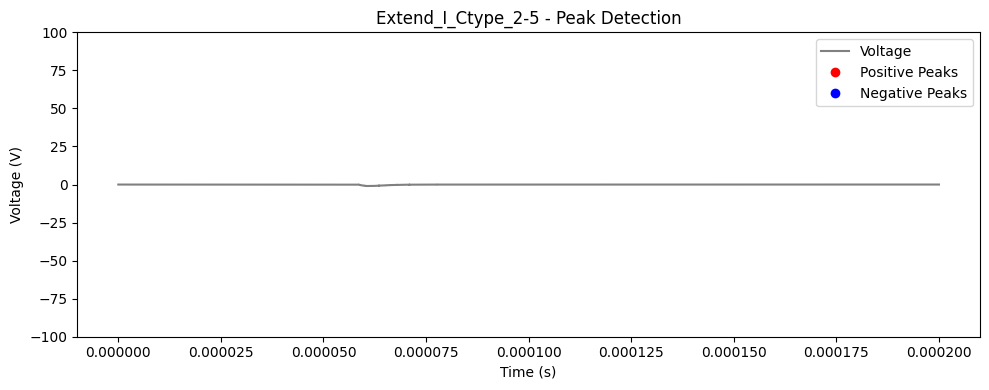

Extend_I_Ctype_4-1_Vpp: 0.00 V


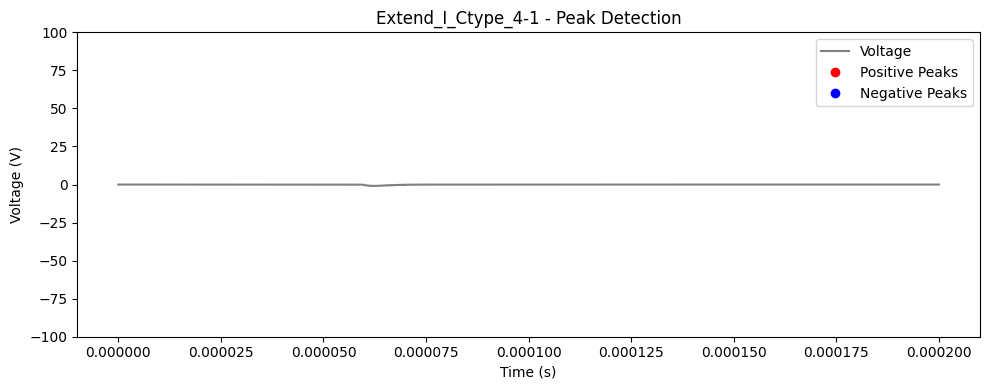

Extend_I_Ctype_4-2_Vpp: 0.00 V


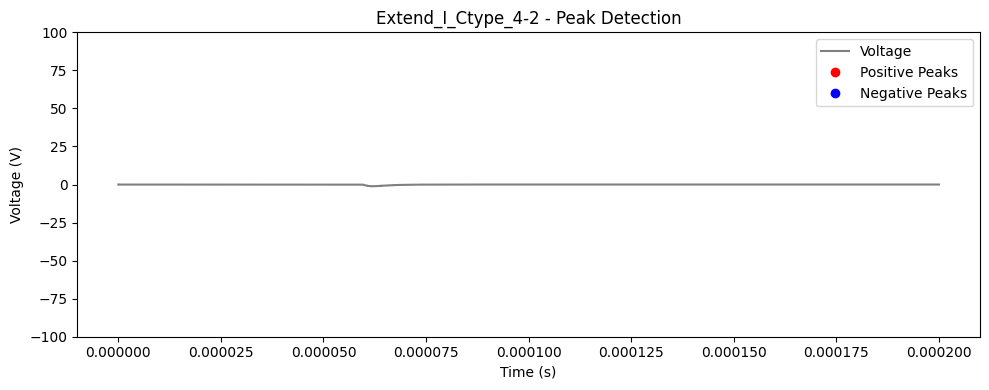

Extend_I_Ctype_4-3_Vpp: 0.00 V


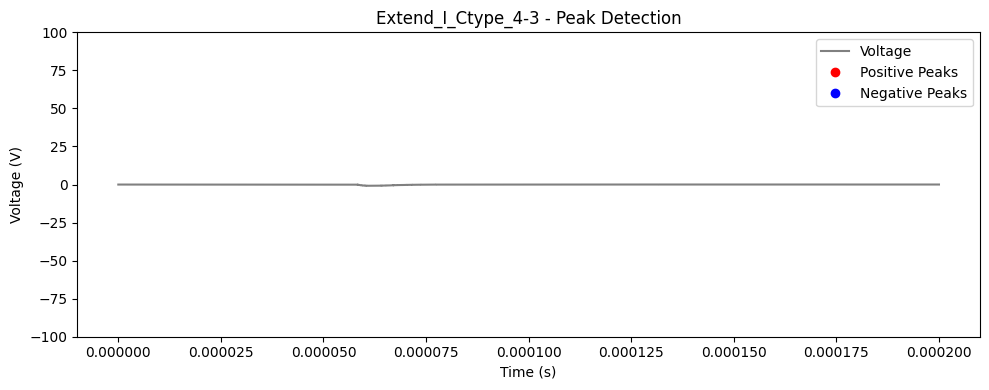

Extend_I_Ctype_4-4_Vpp: 0.00 V


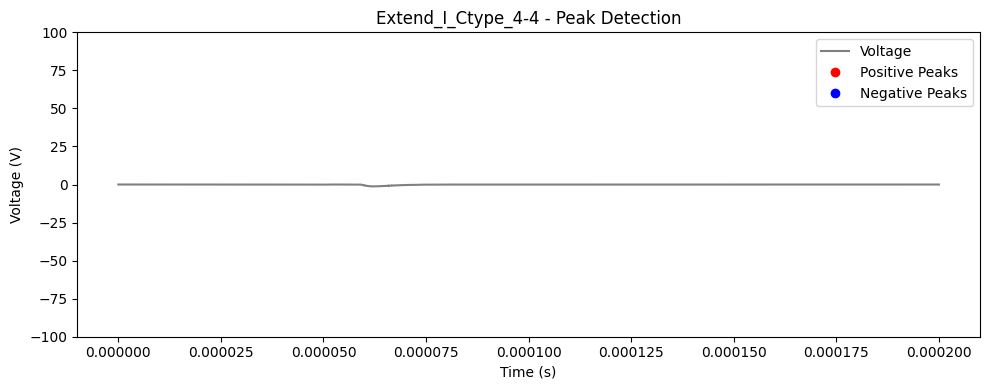

Extend_I_Ctype_4-5_Vpp: 0.00 V


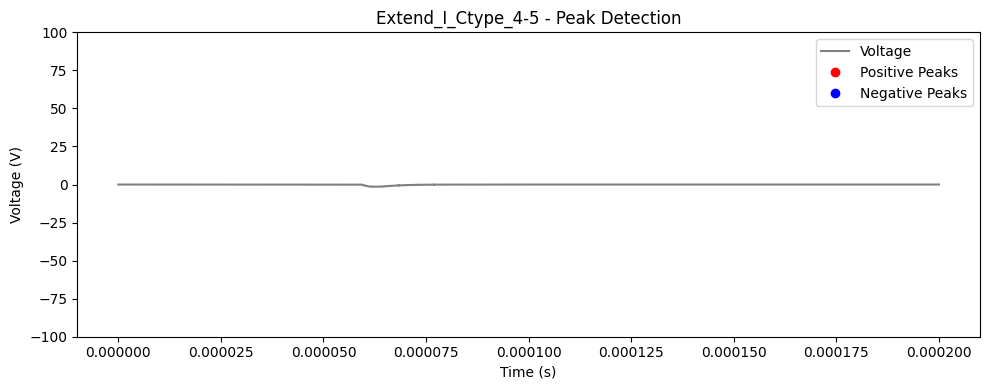

Extend_I_Ctype_6-1_Vpp: 0.00 V


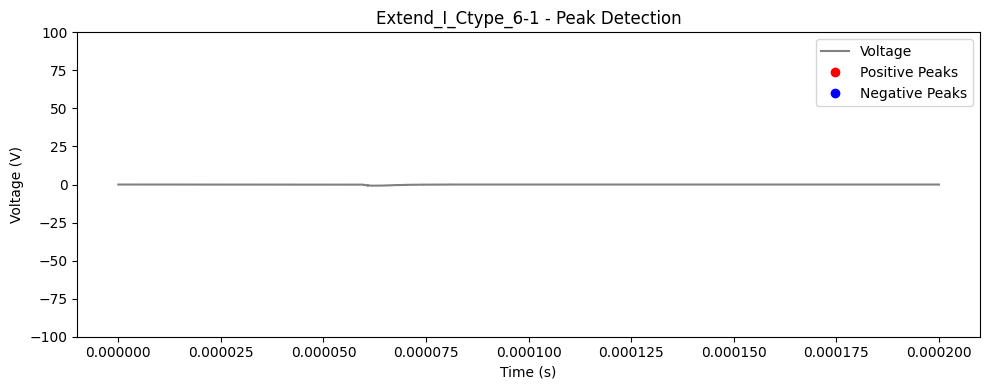

Extend_I_Ctype_6-2_Vpp: 0.00 V


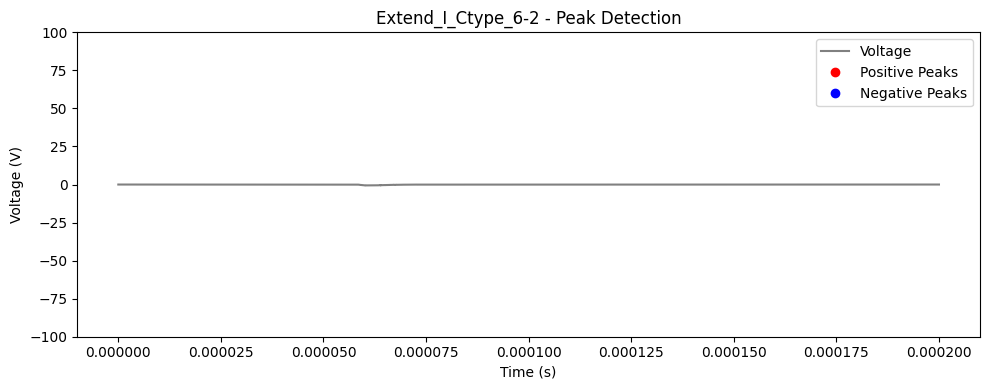

Extend_I_Ctype_6-3_Vpp: 0.00 V


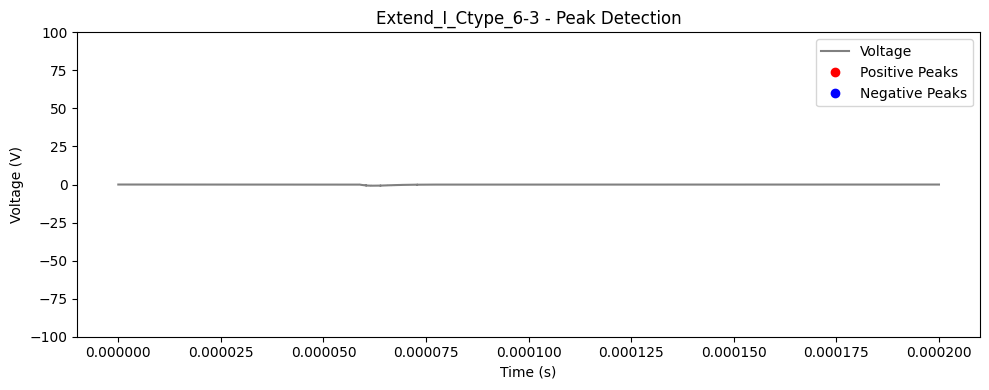

Extend_I_Ctype_6-4_Vpp: 0.00 V


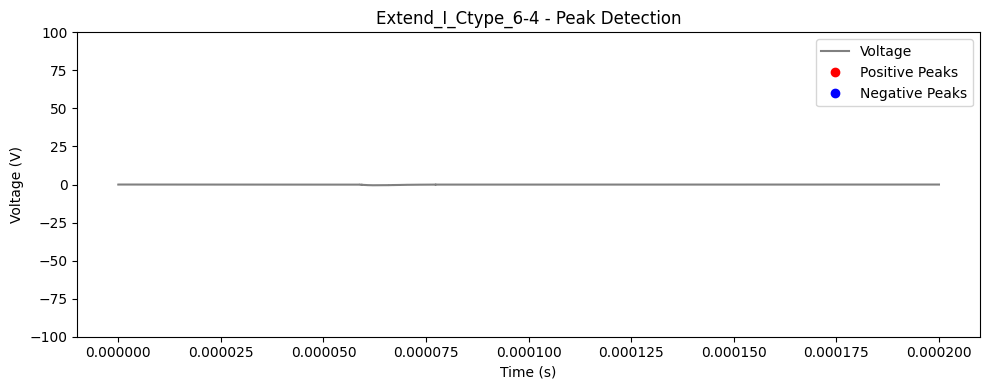

Extend_I_Ctype_6-5_Vpp: 0.00 V


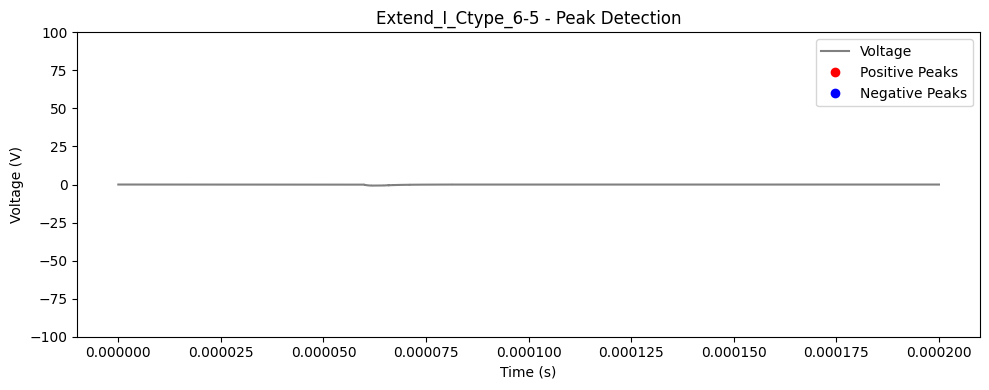

Extend_I_Ctype_8-1_Vpp: 0.00 V


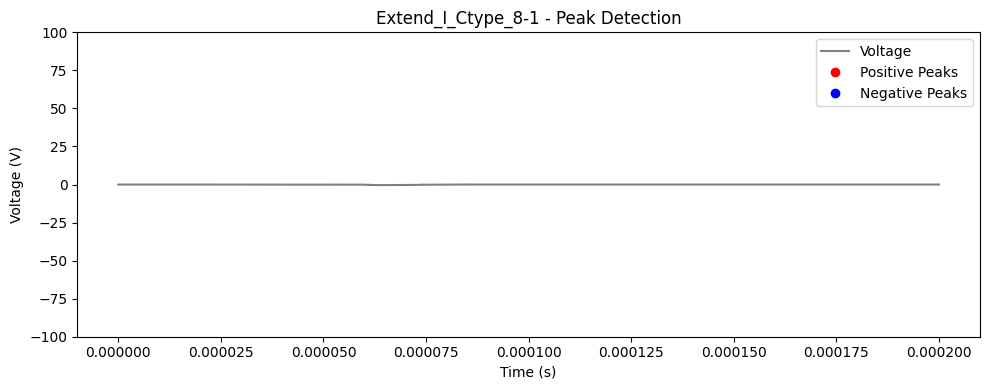

Extend_I_Ctype_8-2_Vpp: 0.00 V


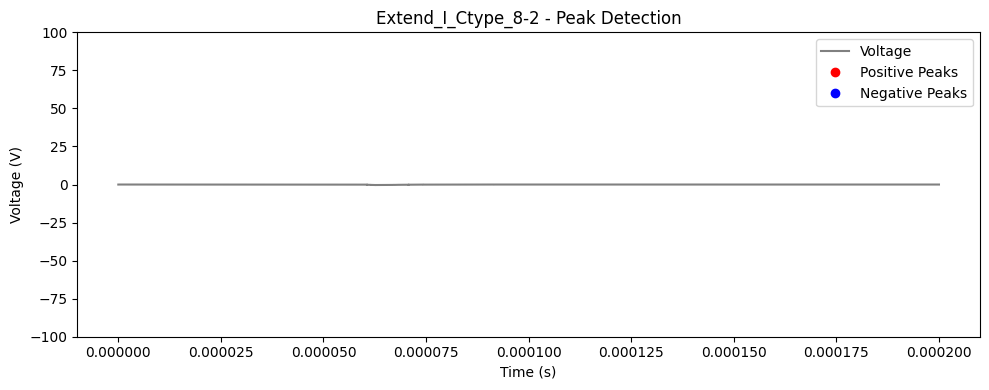

Extend_I_Ctype_8-3_Vpp: 0.00 V


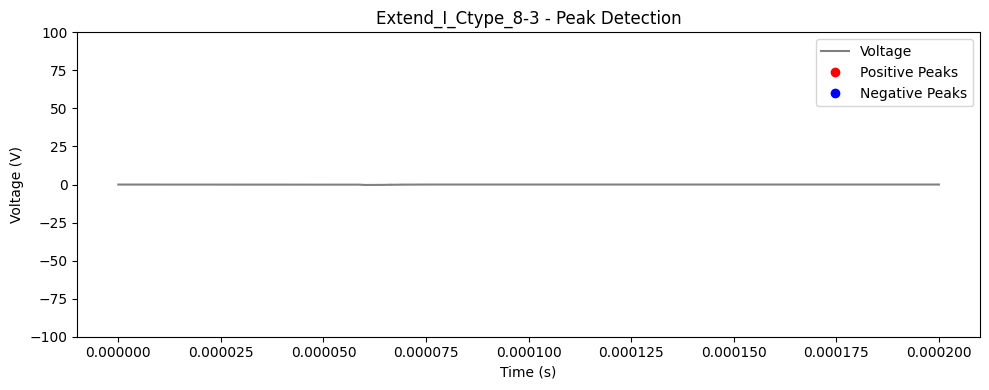

Extend_I_Ctype_8-4_Vpp: 0.00 V


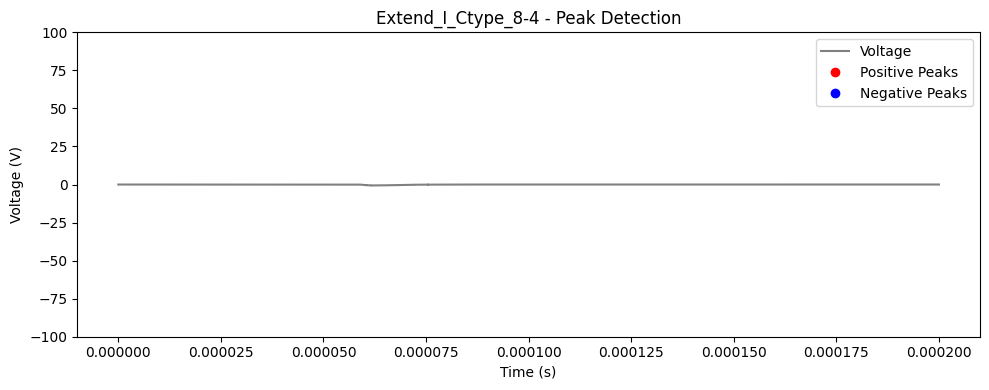

Extend_I_Ctype_8-5_Vpp: 0.00 V


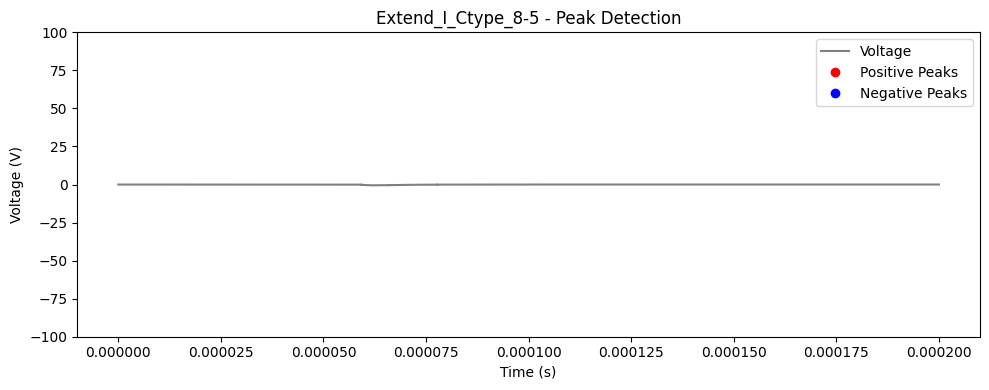

In [4]:
# 폴더 경로 지정
folder_path = r"C:\Users\GCU\OneDrive - gachon.ac.kr\HI Lab\0. Projects\0. On going\2. Aloe inspired DEG\0. 실험자료\2. Collecting data\250417_야간측정\2nd try\A-DEG (ctype)\확대 전류"

# find peak height 설정
height = 5

# 폴더 내 모든 CSV 파일 탐색
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 각 파일별 평균 Vpp 계산 및 그래프 그리기
for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    try:
        data = pd.read_csv(file_path)

        # 시간과 전압 데이터 추출
        time = data.iloc[:, 0].values
        voltage = data.iloc[:, 1].values

        # + / - 피크 탐지
        pos_peaks, _ = find_peaks(voltage, height, distance = 1000)
        neg_peaks, _ = find_peaks(-voltage, height, distance = 1000)

        # 모든 피크 통합 후 정렬
        all_peaks = np.sort(np.concatenate((pos_peaks, neg_peaks)))

        # Vpp 계산
        vpp_list = []
        for i in range(len(all_peaks) - 1):
            start = all_peaks[i]
            end = all_peaks[i + 1]
            if end > start:
                vpp = np.max(voltage[start:end+1]) - np.min(voltage[start:end+1])
                vpp_list.append(vpp)

        mean_vpp = np.mean(vpp_list) if vpp_list else 0
        base_name = os.path.splitext(file_name)[0]
        print(f"{base_name}_Vpp: {mean_vpp:.2f} V")

        # 피크 그래프 그리기
        plt.figure(figsize=(10, 4))
        plt.plot(time, voltage, label='Voltage', color='gray')
        plt.plot(time[pos_peaks], voltage[pos_peaks], 'ro', label='Positive Peaks')
        plt.plot(time[neg_peaks], voltage[neg_peaks], 'bo', label='Negative Peaks')
        plt.title(f"{base_name} - Peak Detection")
        plt.xlabel("Time (s)")
        plt.ylim(-100,100) #알잘딱하세요
        plt.ylabel("Voltage (V)")
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"{file_name} 처리 중 오류 발생: {e}")